In [1]:
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt

from nonlinear_walk import NonlinearRandomWalk

In [2]:
facebook = pd.read_csv(
    "data/facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook



,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [17]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")
G.number_of_edges(), G.number_of_nodes()

(88234, 4039)

In [18]:
import random
def remove_nodes_by_distance(graph, source_node, max_distance):
    nodes_to_remove = set(graph.nodes)
    for distance in range(max_distance):
        nodes_to_remove -= nx.descendants_at_distance(graph, source_node, distance)
    graph.remove_nodes_from(nodes_to_remove)

In [19]:
G.remove_edges_from(nx.selfloop_edges(G))
remove_nodes_by_distance(G, random.choice(list(G.nodes)), 3)
G.number_of_edges(), G.number_of_nodes()

(30780, 756)

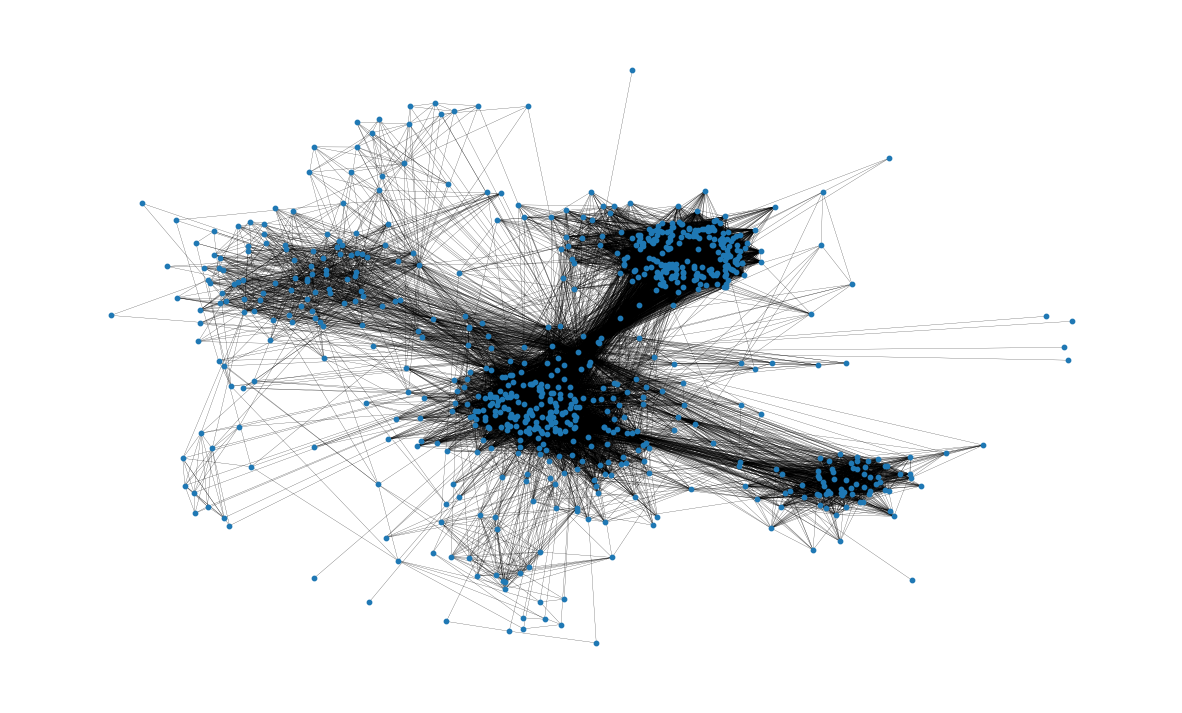

In [21]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [27]:
import numpy as np
G = nx.convert_node_labels_to_integers(G, first_label=0)

initial_node = [random.choice(list(G.nodes))]
initial_pr = np.zeros(G.number_of_nodes()).reshape(-1, 1)
initial_pr[initial_node] = 1 / len(initial_node)
graph_walk = NonlinearRandomWalk(G, initial_pr=initial_pr)

MovieWriter imagemagick unavailable; using Pillow instead.


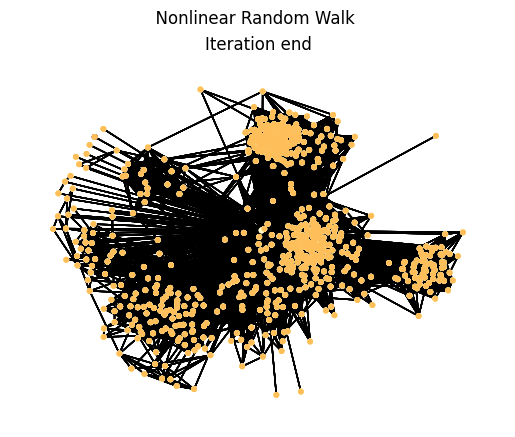

In [23]:
graph_walk.get_visualization(max_iter=2, filename="facebook_1iter.gif")


MovieWriter imagemagick unavailable; using Pillow instead.


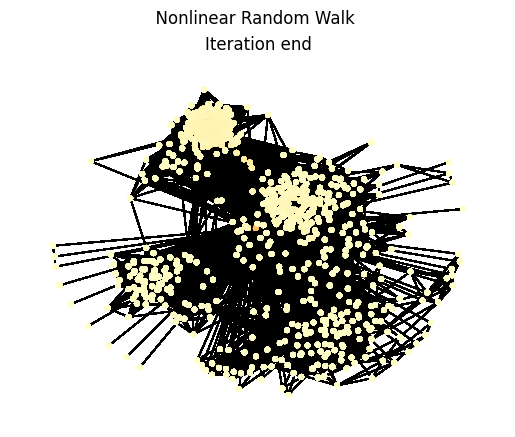

In [33]:
graph_walk.get_visualization(alpha=5, max_iter=500, tol=1e-4, filename='facebook_500iter_alpha5.gif')


MovieWriter imagemagick unavailable; using Pillow instead.


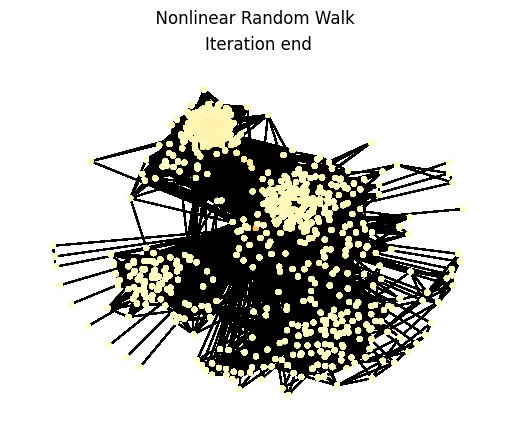

In [34]:
graph_walk.get_visualization(alpha=0, max_iter=500, tol=1e-4, filename='facebook_500iter_alpha0.gif')


MovieWriter imagemagick unavailable; using Pillow instead.


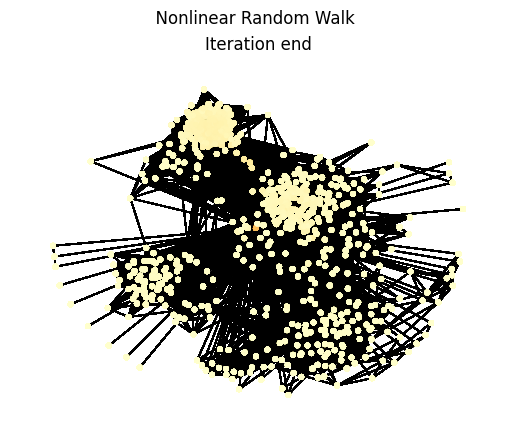

In [35]:
graph_walk.get_visualization(alpha=-5, max_iter=500, tol=1e-4, filename='facebook_500iter_alpha-5.gif')


In [8]:
graph_walk.calculate_for_alphas(-6, 6, 100, tol=1e-6, max_iter=200)

OSError: [Errno 22] Invalid argument: 'nonlinear_random_walk-2023-12-15T17:18:20.350301.png'

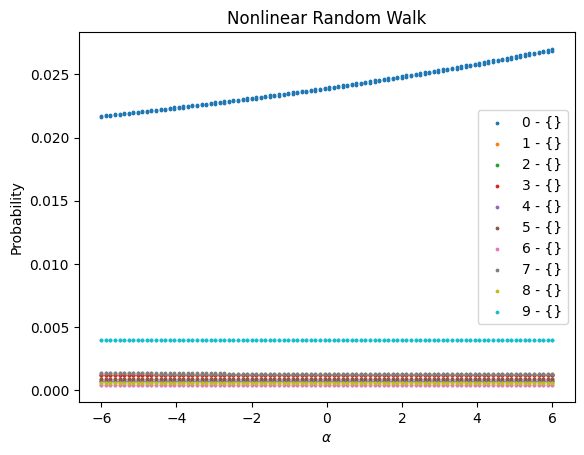

In [9]:
graph_walk.plot_for_alphas(range(0,10))

In [ ]:
graph_walk.plot_for_alphas(range(1255,1265))


In [ ]:
graph_walk.plot_for_alphas(range(2525,2535))
